# Polynomial Regression with SciKit-Learn

### Why we need polynoimal features?
- Sometimes linear regression is not enough for a feature which acts like log(x) which is not linear line. So we need higher order to transform it into linear.
- Another use case is because of interaction (synergy) between one feature and another. Example: newspaper channel alone doesn't increase sales. TV channel alone makes some sales. However if newspaper channel is added in addition to TV channel, it increase more sales. This maybe because people got reminded about the product on newspaper, after they wached it on TV before.
- Polynomial features allow us to create new features based on the original ones, by increasing the order (2, 3, ..etc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data/Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# seperate features and labels
X = df.drop('sales', axis=1)
y = df['sales']

# Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures

#### The below converter is not the model. It is just feature converter.
- converting the original features and increasing them into specific degrees.
- include_bias is 1

## Creating Polynomial Features
$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

In [8]:
ploynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
ploynomial_converter.fit(X) #converter tries to explore the features by reading every X columns

PolynomialFeatures(include_bias=False)

In [33]:
poly_features = ploynomial_converter.transform(X) # converter actually makes the transformation

In [ ]:
# ploynomial_converter.fit_transform(X)
# same as above 2 seperate lines of fit() and transform()

In [34]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

#### We can see that features column got increased after transformation.

In [25]:
poly_features.shape # after transformation 9 columns

(200, 9)

In [15]:
X.shape #original ones 3 columns

(200, 3)

In [19]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [26]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

------

In [27]:
poly_features[0][:3] # 3 original ones

array([230.1,  37.8,  69.2])

In [29]:
poly_features[0][:3] ** 2 # 3 squared ones

array([52946.01,  1428.84,  4788.64])

3 interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [30]:
230.1*37.8

8697.779999999999

In [31]:
230.1*69.2

15922.92

In [32]:
37.8*69.2

2615.7599999999998

------

# Train | Test Split

In [35]:
ploynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
# help(train_test_split)

In [40]:
# using poly features
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
lr_model = LinearRegression()

In [45]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
test_predictions = lr_model.predict(X_test)

### Evaluation on the Test Set

In [52]:
# performance 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
MAE = mean_absolute_error(y_test, test_predictions)

In [54]:
MSE = mean_squared_error(y_test, test_predictions)

In [55]:
RMSE = np.sqrt(MSE)

In [57]:
MAE

0.4896798044803558

In [58]:
RMSE

0.664643175726899

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

In [60]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [61]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [59]:
lr_model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

As we can see from coefficient, model is not even considering newspaper (the last one) which is squared of 69.2.

4.788640e+03 is tied to -3.04715806e-05 ( which is almost 0)


In [62]:
69.2 ** 2

4788.64

-------

---
## Choosing a Model

### Adjusting Parameters

In [63]:
# create the different order polynomial
# split ploy features : train / test
# fit on train set
# save RMSE for BOTH train & test sets
# PLOT the results (error vs poly order)

In [77]:
train_rmse_errors = []
test_rmse_errors = []

for deg in range(1, 10):
    # create poloynomial features on different degree
    poly_converter = PolynomialFeatures(degree=deg, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    # split poly featurs: train/test
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # model fit
    lr_model = LinearRegression(fit_intercept=True)
    lr_model.fit(X_train, y_train)
    
    # prediction
    train_pred = lr_model.predict(X_train) 
    test_pred = lr_model.predict(X_test)
    
    # calcuate RMSE
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # store RMSE
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [78]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902067,
 0.3517083688399348,
 0.25093430355651797,
 0.20023729045436175,
 5.258394206861527,
 0.20696080521253987,
 0.1695718505595044]

In [79]:
test_rmse_errors

[1.5161519375993884,
 0.664643175726899,
 0.5803286825198471,
 0.5077742629819954,
 2.575806169242227,
 4.3308901816718155,
 174.62982254526315,
 4679.50452620065,
 95835.8634070512]

#### Plot the train/test RMSE

As we can see from the below plot, the error exploded around poly degree of 4 for TEST set.
- this is overfitting
- for train set, the error gets lower and lower when the poly degree get higher and higher.
- for test set, the error gets higher and higher when the poly degree get higher (after a certain poly degree).

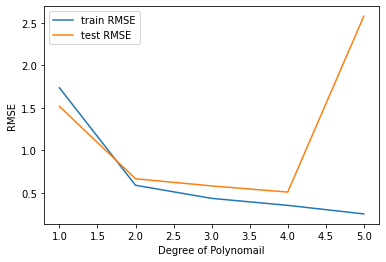

In [88]:
plt.plot(range(1,6), train_rmse_errors[:5], label='train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='test RMSE')
plt.xlabel('Degree of Polynomail')
plt.ylabel('RMSE')
plt.legend();

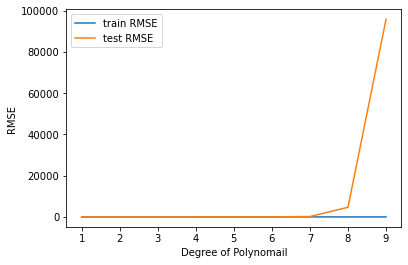

In [89]:
plt.plot(range(1,10), train_rmse_errors, label='train RMSE')
plt.plot(range(1,10), test_rmse_errors, label='test RMSE')
plt.xlabel('Degree of Polynomail')
plt.ylabel('RMSE')
plt.legend();

-----

# Finalizing Model Choice

As for the final model, we will choose 3rd polynomial

In [90]:
final_converter = PolynomialFeatures(degree=3, include_bias=False)

In [91]:
final_model = LinearRegression()

In [92]:
full_converted_X = final_converter.fit_transform(X)

In [93]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [94]:
from joblib import dump, load

In [95]:
dump(final_model, 'Models/mdl_poly.pkl')

['Models/mdl_poly.pkl']

In [96]:
dump(final_converter, 'Models/converter_poly.pkl')

['Models/converter_poly.pkl']

------------

# Prediction on New Data

In [97]:
loaded_converter = load('Models/converter_poly.pkl')

In [98]:
loaded_model = load('Models/mdl_poly.pkl')

In [99]:
campaign = [[149, 22, 12]]

In [103]:
transformed_data = loaded_converter.fit_transform(campaign)

In [105]:
loaded_model.predict(transformed_data)

array([14.64501014])